In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import kde
from tqdm import tqdm_notebook
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

## синтезирую задачу

In [2]:
x_class1 = np.random.randn(5000, 2)*np.array([2, 3])+np.array([3, 3])

In [3]:
x_class0 = np.random.randn(1000, 2)*np.array([3, 2])-np.array([0, 0])

In [4]:
y = np.squeeze(np.concatenate([np.ones((5000,1), dtype=int), np.zeros((1000,1), dtype=int)], axis=0))

In [5]:
x = np.concatenate([x_class1, x_class0], axis=0)
x.shape

(6000, 2)

In [6]:
y.shape

(6000,)

In [7]:
nbins=300

In [8]:
xmesh, ymesh = np.mgrid[-10:10:nbins*1j, -10:10:nbins*1j]

In [9]:
k_class0 = kde.gaussian_kde(x_class0.T)
dens_class0 = k_class0(np.vstack([xmesh.flatten(), ymesh.flatten()]))

In [10]:
k_class1 = kde.gaussian_kde(x_class1.T)
dens_class1 = k_class1(np.vstack([xmesh.flatten(), ymesh.flatten()]))

In [11]:
sample_size = x.shape[0]
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2)

In [19]:
ytest_proba = np.random.rand(*(ytest.shape))[:,np.newaxis]
ytest_pred = (ytest_proba>=0.5)
print('accuracy: ' + str(np.mean(np.squeeze(ytest_pred)==ytest)))

accuracy: 0.49833333333333335


$$
TPR = \frac{TP}{TP+FN} = Recall
$$

In [26]:
def tpr(labels_true, pred_proba, proba_threshold):
    pred_ones = np.squeeze(pred_proba >= proba_threshold)
    TP = pred_ones & (labels_true == 1)
    tprate = np.sum(TP)/np.sum(labels_true == 1)
    return tprate

$$
FPR = \frac{FP}{FP+TN}
$$

In [27]:
def fpr(labels_true, pred_proba, proba_threshold):
    pred_ones = np.squeeze(pred_proba >= proba_threshold)
    FP = pred_ones & (labels_true == 0)
    fprate = np.sum(FP)/np.sum(labels_true == 0)
    return fprate

In [24]:
ytest_proba.shape, ytest.shape

((1200, 1), (1200,))

In [28]:
tprs = []
fprs = []
threholds = np.linspace(0.0, 1.0, 100)[::-1]
for th in threholds:
    tprs.append(tpr(ytest, ytest_proba, th))
    fprs.append(fpr(ytest, ytest_proba, th))

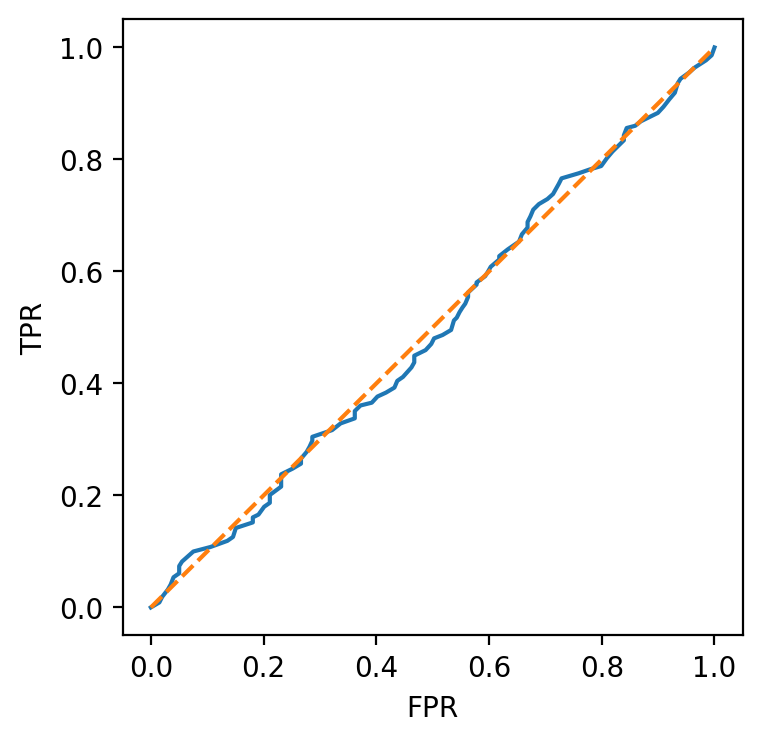

In [38]:
f = plt.figure(figsize=(4,4), dpi=200)
plt.plot(fprs, tprs)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(np.arange(0.0, 1.01, 0.01), np.arange(0.0, 1.01, 0.01), '--')
plt.show();

In [30]:
tprs = np.array(tprs)
fprs = np.array(fprs)

In [31]:
fprs[0], tprs[0]

(0.0, 0.0)

In [32]:
aucroc = np.sum(0.5*(tprs[1:]+tprs[:-1]) * (fprs[1:]-fprs[:-1]))

In [33]:
aucroc

0.495622467984277

In [34]:
aucroc

0.495622467984277

In [35]:
np.trapz(tprs, fprs)

0.495622467984277

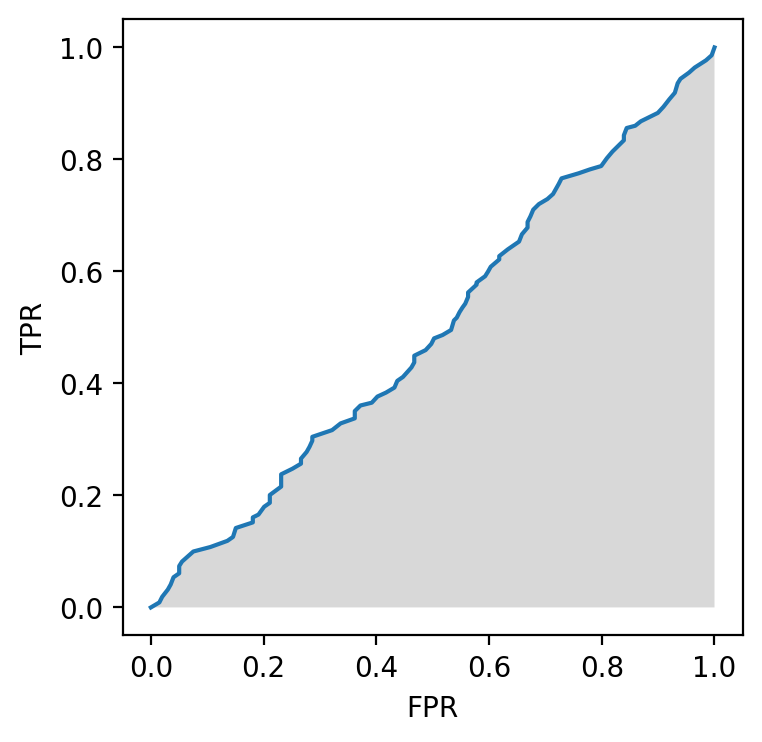

In [36]:
f = plt.figure(figsize=(4,4), dpi=200)
plt.plot(fprs, tprs)
plt.fill_between(fprs, tprs, 0.0, facecolor='gray', alpha=0.3)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show();